# London Fire Brigade Calls

This notebook is for exploration of London Fire Brigade data publicly deposited on Kaggle datasets: https://www.kaggle.com/jboysen/london-fire.

##### Questions for exploration:

- distribution of **all calls across boroughs**: 
   - which boroughs have the highest call volume? lowest?
   - [external data] which has most calls *per population*? fewest?
 
- distribution of **all calls over time** (daily, weekly patterns)

- investigation of **response times**:
    - which boroughs have fastest response time? slowest?


##### Tasks for visualisation:

- On a map of London, visualise:
    - density of brigade calls (per borough / per postcode)
    - response times
    - [external data] population and brigade centres per population / per area

### Package dependencies

In [1]:
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 

print ("Imported Numpy" , np.__version__)
print ("Imported Pandas" , pd.__version__)
print ("Imported Matplotlib", matplotlib.__version__)
print ("Imported Datetime")
print ("Imported Time")
print ("Imported Seaborn", sns.__version__)

Imported Numpy 1.13.1
Imported Pandas 0.20.3
Imported Matplotlib 2.0.2
Imported Datetime
Imported Time
Imported Seaborn 0.8.0


### Set plotting style

In [13]:
### Setting plotting style
sns.mpl.rc("figure", figsize=(12,7))
sns.set_context(context = 'poster', font_scale=1.3)
params = {'xtick.direction': 'in',
                'xtick.major.size': 8,
                'xtick.minor.size': 5,
                'xtick.color': '0.1',
                'ytick.direction': 'in',
                'ytick.major.size': 8,
                'ytick.minor.size': 5,
                'ytick.color': '0.15',
                'axes.linewidth': 2.0,
                'axes.edgecolor': '0.1',
                'grid.color': '.9',
               }
sns.set_style("white", params)

### Define function to print all column names

In [2]:
def columns(df):
    for c in df.columns:
        print (c)

### Data import

In [3]:
starttime = time.time()

df = pd.read_csv('london_fire_brigade:service_calls.csv')

stoptime = time.time()
print("Data imported in %.2f s" %(stoptime - starttime))


Data imported in 0.25 s


In [4]:
df = df.sort_values('date_of_call')

columns(df)

address_qualifier
borough_code
borough_name
cal_year
date_of_call
easting_m
easting_rounded
first_pump_arriving_attendance_time
first_pump_arriving_deployed_from_station
frs
hour_of_call
incident_group
incident_number
incident_station_ground
northing_m
northing_rounded
num_pumps_attending
num_stations_with_pumps_attending
postcode_district
postcode_full
proper_case
property_category
property_type
second_pump_arriving_attendance_time
second_pump_arriving_deployed_from_station
special_service_type
stop_code_description
time_of_call
timestamp_of_call
ward_code
ward_name
ward_name_new


### Data exploration

#### Call volume by borough

In [5]:
gr_calls_by_borough = df.groupby('borough_name')
calls_by_borough = gr_calls_by_borough.count()['date_of_call'].sort_values(ascending = False)

calls_by_borough

borough_name
WESTMINSTER               2469
CAMDEN                    1500
SOUTHWARK                 1435
LAMBETH                   1383
TOWER HAMLETS             1330
HACKNEY                   1177
CROYDON                   1174
LEWISHAM                  1097
EALING                    1054
NEWHAM                    1053
BARNET                    1049
WANDSWORTH                1036
HILLINGDON                1024
ISLINGTON                 1019
GREENWICH                 1017
ENFIELD                    996
BRENT                      988
KENSINGTON AND CHELSEA     988
BROMLEY                    893
HAMMERSMITH AND FULHAM     893
HARINGEY                   879
WALTHAM FOREST             867
HOUNSLOW                   845
HAVERING                   723
REDBRIDGE                  709
BEXLEY                     666
BARKING AND DAGENHAM       659
MERTON                     621
RICHMOND UPON THAMES       569
HARROW                     555
SUTTON                     538
KINGSTON UPON THAMES      

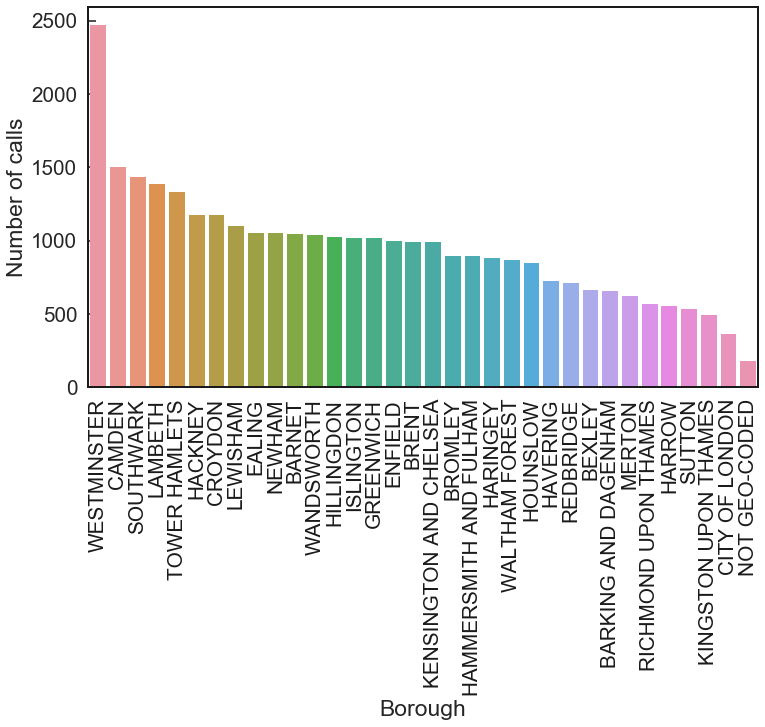

In [23]:
ax = sns.countplot(x = 'borough_name', data = df, order = calls_by_borough.index)

ax.set_xticklabels(labels = calls_by_borough.index, rotation='vertical')
ax.set_ylabel('Number of calls')
ax.set_xlabel('Borough')

#### Response time by borough

In [25]:
response_times_by_borough = gr_calls_by_borough.mean()['first_pump_arriving_attendance_time'].sort_values(ascending = False)
response_times_by_borough

borough_name
NOT GEO-CODED             585.444444
HILLINGDON                373.313253
BROMLEY                   364.326721
ENFIELD                   360.737619
HARROW                    358.102421
REDBRIDGE                 352.067153
BEXLEY                    350.549536
HAVERING                  349.918338
BARNET                    345.315582
BRENT                     342.423280
RICHMOND UPON THAMES      341.369176
BARKING AND DAGENHAM      336.985507
SUTTON                    333.806883
EALING                    333.027668
MERTON                    332.583612
HOUNSLOW                  328.640704
GREENWICH                 324.002107
KINGSTON UPON THAMES      320.073375
HARINGEY                  318.033058
NEWHAM                    315.846701
CROYDON                   314.576957
WESTMINSTER               313.033319
CAMDEN                    306.806543
WALTHAM FOREST            301.576291
CITY OF LONDON            301.269886
SOUTHWARK                 299.875000
HAMMERSMITH AND FULHAM   

In [70]:
df_per_Borough = pd.concat([calls_by_borough, response_times_by_borough], axis=1)
df_per_Borough = df_per_Borough.reset_index()
df_per_Borough.columns  = ['Borough', 'Total Calls', 'Average Attendance Time']
df_per_Borough.head()


,Borough,Total Calls,Average Attendance Time
0,BARKING AND DAGENHAM,659,336.985507
1,BARNET,1049,345.315582
2,BEXLEY,666,350.549536
3,BRENT,988,342.423280
4,BROMLEY,893,364.326721


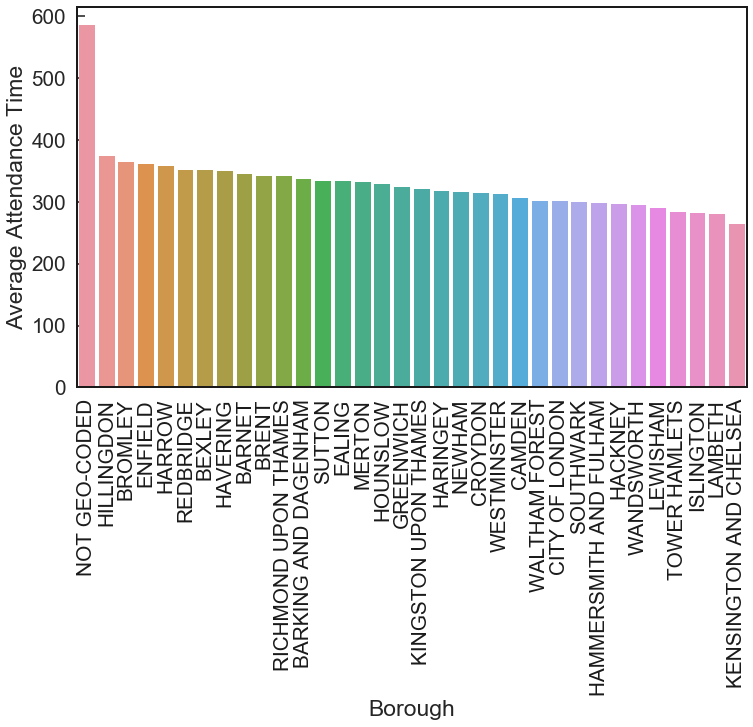

In [69]:
df_per_Borough.sort_values('Average Attendance Time', inplace=True, ascending=False)
ax = sns.barplot(x= 'Borough', y = 'Average Attendance Time', data = df_per_Borough);
ax.set_xticklabels(labels = df_per_Borough['Borough'], rotation='vertical')
ax.set_ylabel('Average Attendance Time')
ax.set_xlabel('Borough')